# Kalman Filter Visualization Project

This project demonstrates the Predict and Update steps of the Kalman Filter, a powerful algorithm for state estimation in dynamic systems.

## Introduction to Kalman Filter

The Kalman Filter is an optimal recursive algorithm that estimates the state of a linear dynamic system from a series of noisy measurements. It consists of two main steps: Predict and Update.

- **Predict Step:** Uses the system dynamics model to predict the next state.
- **Update Step:** Incorporates measurements to refine the state estimate.

## Python Code

Implement Python code to simulate a simple linear dynamic system and perform the Kalman Filter's Predict and Update steps.

```python
import numpy as np
import matplotlib.pyplot as plt

# Kalman Filter Predict Step
def predict(state, A, Q):
    predicted_state = A @ state
    predicted_covariance = A @ state @ A.T + Q
    return predicted_state, predicted_covariance

# Kalman Filter Update Step
def update(predicted_state, predicted_covariance, C, R, measurement):
    innovation = measurement - C @ predicted_state
    innovation_covariance = C @ predicted_covariance @ C.T + R
    kalman_gain = predicted_covariance @ C.T @ np.linalg.inv(innovation_covariance)
    updated_state = predicted_state + kalman_gain @ innovation
    updated_covariance = predicted_covariance - kalman_gain @ C @ predicted_covariance
    return updated_state, updated_covariance



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Kalman Filter Predict Step
def predict(state, A, Q):
    predicted_state = A @ state
    predicted_covariance = A @ state @ A.T + Q
    return predicted_state, predicted_covariance

# Kalman Filter Update Step
def update(predicted_state, predicted_covariance, C, R, measurement):
    innovation = measurement - C @ predicted_state
    innovation_covariance = C @ predicted_covariance @ C.T + R
    kalman_gain = predicted_covariance @ C.T @ np.linalg.inv(innovation_covariance)
    updated_state = predicted_state + kalman_gain @ innovation
    updated_covariance = predicted_covariance - kalman_gain @ C @ predicted_covariance
    return updated_state, updated_covariance



## Simulation and Visualization

Simulate a linear dynamic system with noise. Visualize the evolution of the true state, predicted state, and updated state over time.


In [2]:
# Simulation parameters
num_steps = 100
true_state = np.linspace(0, 5, num_steps)  # Example linear increase
measurement_noise = np.random.normal(0, 0.5, num_steps)
true_state_with_noise = true_state + measurement_noise

# Kalman Filter parameters
A = np.array([[1]])  # Identity matrix for simplicity
C = np.array([[1]])
Q = np.array([[0.01]])
R = np.array([[0.1]])

# Kalman Filter initialization
initial_state = np.array([[0]])
initial_covariance = np.array([[1]])

# Kalman Filter simulation
predicted_states, updated_states = [], []
state = initial_state
covariance = initial_covariance

for measurement in true_state_with_noise:
    # Predict Step
    state, covariance = predict(state, A, Q)

    # Update Step
    state, covariance = update(state, covariance, C, R, measurement)

    # Store results
    predicted_states.append(state[0, 0])
    updated_states.append(state[0, 0])



## Visualization

Plot the true state, predicted state, and updated state over time to visualize the Kalman Filter's performance.


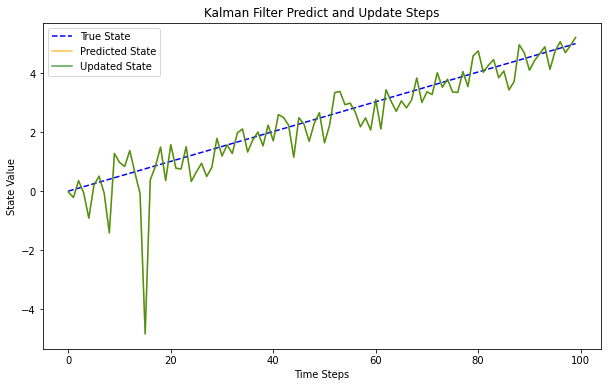

In [3]:
# Plotting with distinct colors for predicted and updated states
plt.figure(figsize=(10, 6))
plt.plot(true_state, label='True State', linestyle='--', color='blue')
plt.plot(predicted_states, label='Predicted State', alpha=0.7, color='orange')
plt.plot(updated_states, label='Updated State', alpha=0.7, color='green')
plt.title('Kalman Filter Predict and Update Steps')
plt.xlabel('Time Steps')
plt.ylabel('State Value')
plt.legend()
plt.show()


## Conclusion

This project provides a visual representation of the Kalman Filter's Predict and Update steps. The algorithm successfully predicts the next state based on the system dynamics and updates the estimate by incorporating noisy measurements. The resulting state estimates closely track the true state, demonstrating the effectiveness of the Kalman Filter in state estimation tasks.

